In [1]:
library(tidyverse)
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘ggpubr’ was built under R version 4.3.1”


In [2]:
volume <- read_csv("/share/Data/hxie/project/202209/esc_xwliu/esc0312_tidyup/fig2/volume_alpha04.csv")

New names:
• `` -> `...1`
Rows: 238 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Unnamed: 0, orig.ident, sample2, sample3, cellcycle_threshold, day...
dbl (14): ...1, nCount_RNA, nFeature_RNA, nCount_SCT, nFeature_SCT, SCT_snn_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


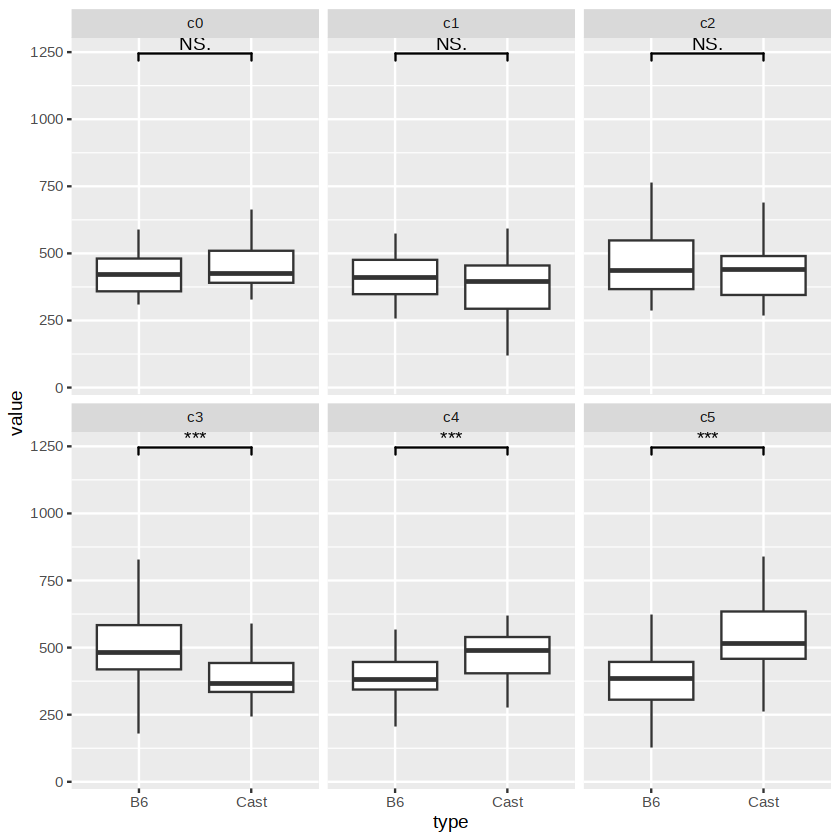

In [3]:
volume %>% select(plot_cluster, mat_alpha_volume, pat_alpha_volume) %>% 
    pivot_longer(!plot_cluster, names_to = "type", values_to = "value") %>%
    mutate(type = ifelse(type == "mat_alpha_volume","Cast","B6")) %>%
    mutate(plot_cluster = paste0("c",plot_cluster)) %>%
    ggplot(aes(x = type, y = value)) + 
    geom_boxplot(outlier.shape = NA) + facet_wrap(~plot_cluster) + geom_signif(test = 't.test', comparisons = list(c("B6", "Cast")), y_position = c(1200), map_signif_level = TRUE)

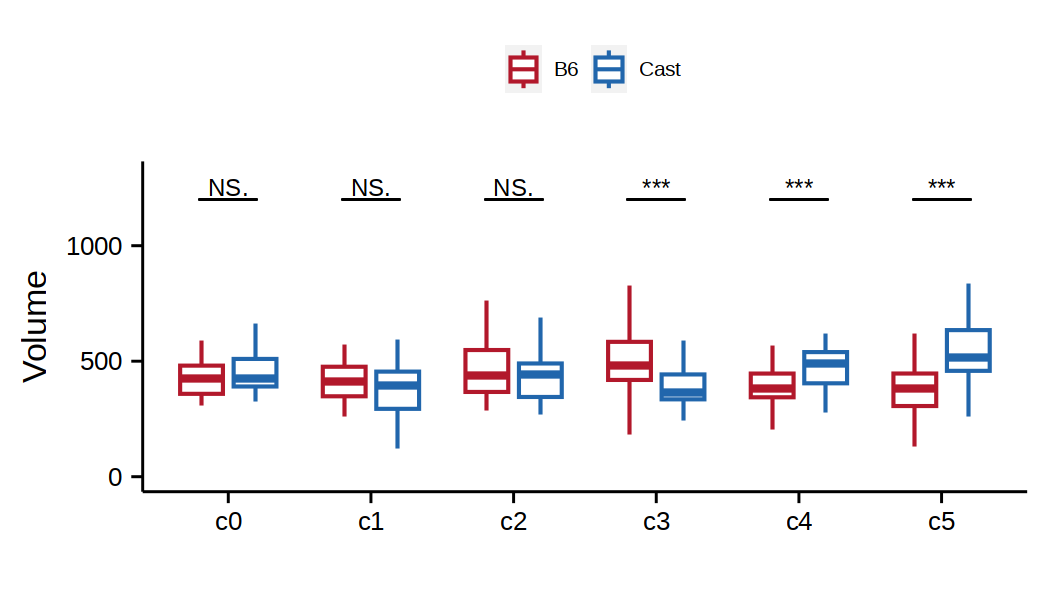

In [4]:
options(repr.plot.width=3.5, repr.plot.height=2, repr.plot.res = 300)
p <- volume %>% select(plot_cluster, mat_alpha_volume, pat_alpha_volume) %>% 
    pivot_longer(!plot_cluster, names_to = "type", values_to = "value") %>%
    mutate(type = ifelse(type == "mat_alpha_volume","Cast","B6")) %>%
    mutate(plot_cluster = paste0("c",plot_cluster)) %>%
    ggplot(aes(x = plot_cluster, y = value, color = type)) + 
    geom_boxplot(outlier.shape = NA, width = 0.6, linewidth = 0.35, position = position_dodge(0.75)) + 
    xlab("") + ylab("Volume") + scale_color_manual(values = c("#b2182b","#2166ac"), name = "") + 
    theme(legend.position = "top",
      text = element_text(family="Arial", size=6),
      panel.border = element_blank(),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      axis.line = element_line(color="black", linewidth = 0.25),
      axis.ticks = element_line(color="black", linewidth = 0.25),
      axis.text = element_text(color="black",size=6),
      legend.key = element_rect(colour = NA),
      legend.key.width = unit(0.3, "cm"),
      legend.key.height = unit(0.4, "cm"),
      axis.title=element_text(color="black",size=8,face="plain"),
  ) + geom_signif(y_position = c(rep(1200, 6)), xmin = c(0.8,1.8,2.8,3.8,4.8,5.8), xmax = c(1.2,2.2,3.2,4.2,5.2,6.2),
                tip_length = 0, 
                annotation = c("NS.","NS.","NS.","***","***","***"),size = 0.25, color = 'black', textsize = 2) + ylim(0,1300)
p

# ggsave("/share/Data/hxie/project/202209/esc_xwliu/figures_0827/fig2/fig2B_volume.svg", width = 3.5, height = 2, units = "in", dpi = 300)